In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bike_data = pd.read_excel('Bike_Sales.xlsx')
bike_data.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2017-01-01,1,January,2017,17,Youth (<25),M,Canada,British Columbia,Bikes,Road Bikes,"Road-250 Red, 44",2,1519,2443,1848,3038,4886
1,2017-01-01,1,January,2017,23,Youth (<25),M,Australia,Victoria,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2,1252,2295,2086,2504,4590
2,2017-01-01,1,January,2017,33,Young Adults (25-34),F,France,Yveline,Bikes,Road Bikes,"Road-150 Red, 48",2,2171,3578,2814,4342,7156
3,2017-01-01,1,January,2017,39,Adults (35-64),M,United States,Washington,Bikes,Road Bikes,"Road-550-W Yellow, 38",2,713,1120,814,1426,2240
4,2017-01-01,1,January,2017,42,Adults (35-64),M,United States,California,Bikes,Road Bikes,"Road-750 Black, 44",2,344,540,392,688,1080


In [3]:
bike_data.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [4]:
bike_data_numeric = bike_data.select_dtypes(include='number')
bike_data_numeric.head()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,1,2017,17,2,1519,2443,1848,3038,4886
1,1,2017,23,2,1252,2295,2086,2504,4590
2,1,2017,33,2,2171,3578,2814,4342,7156
3,1,2017,39,2,713,1120,814,1426,2240
4,1,2017,42,2,344,540,392,688,1080


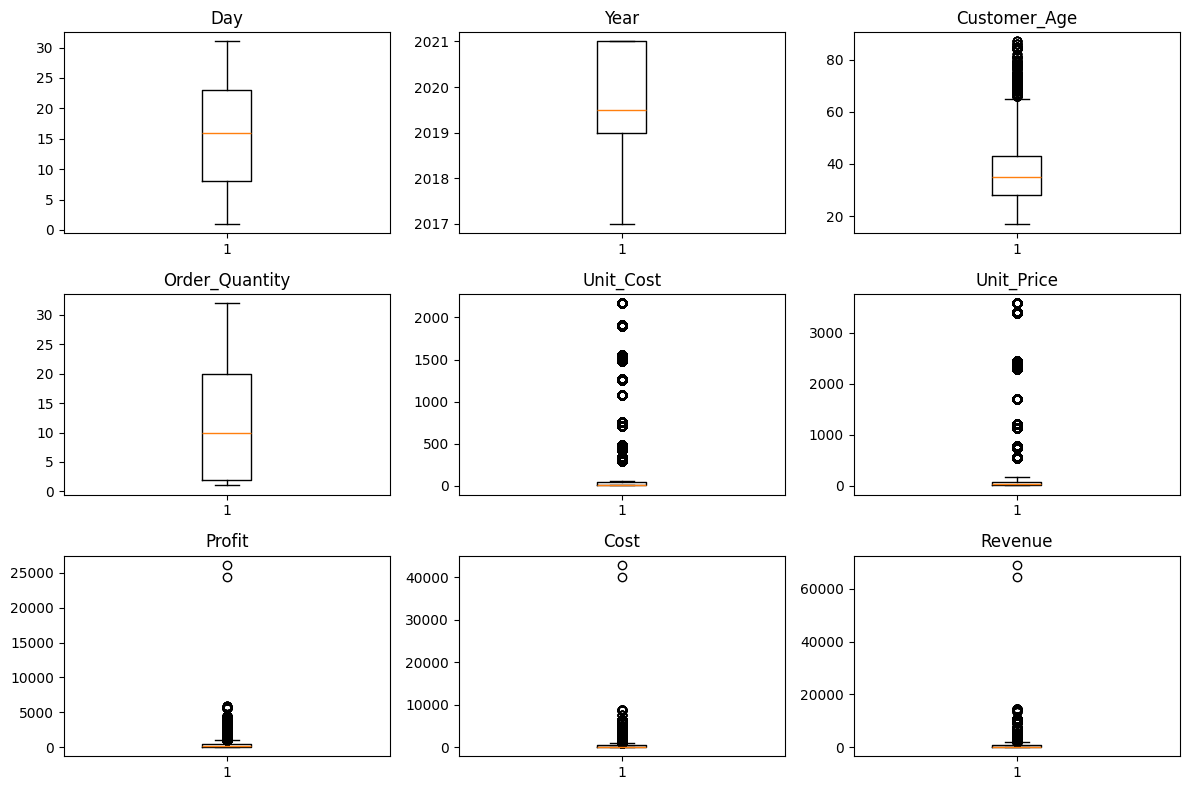

In [10]:
plt.figure(figsize=(12,8))
for i, col in enumerate(bike_data_numeric.columns):
    plt.subplot(3, 3, i+1)
    plt.boxplot(bike_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [14]:
def handling_outliers(columns):
    for i in columns:
        q1 = bike_data[i].quantile(.25)
        q3 = bike_data[i].quantile(.75)

        IQR = q3 - q1

        lower_bound = q1-1.5*IQR
        upper_bound = q3+1.5*IQR

        bike_data[i] = np.where(bike_data[i]<lower_bound,lower_bound,bike_data[i])
        bike_data[i] = np.where(bike_data[i]>upper_bound,upper_bound,bike_data[i])
handling_outliers(bike_data_numeric)

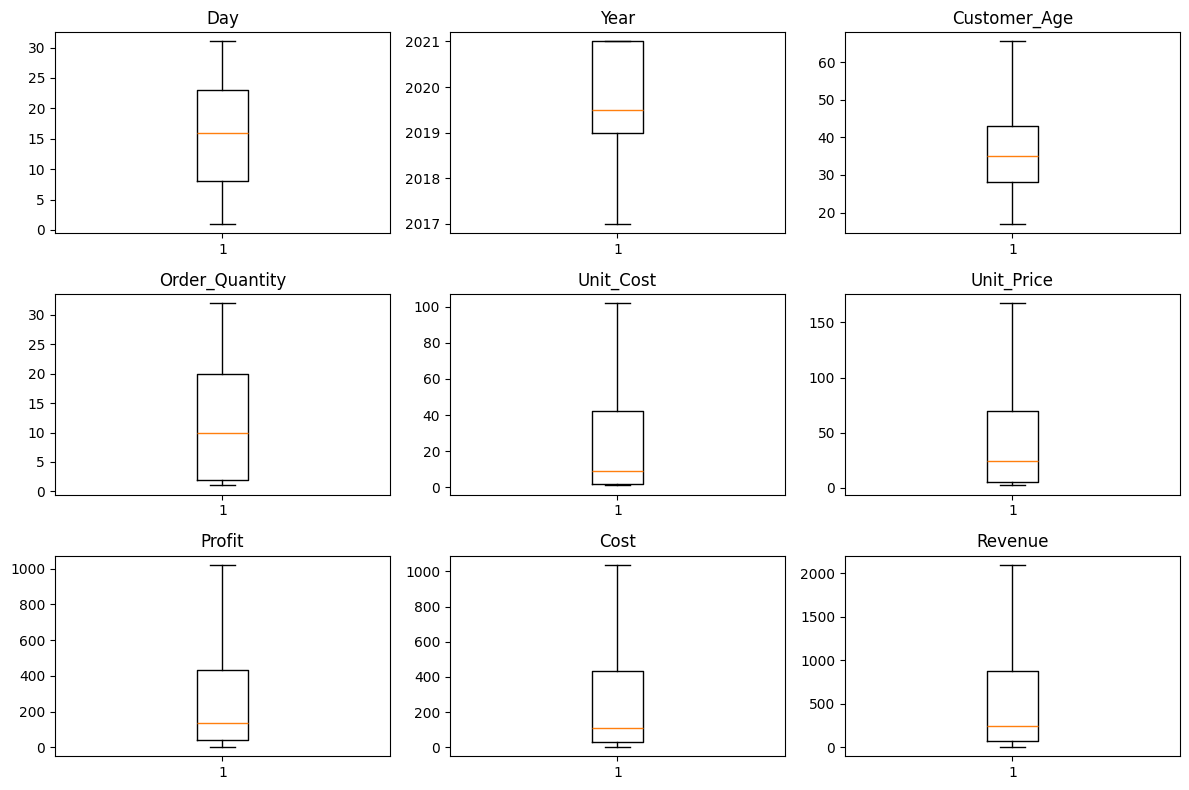

In [16]:
def boxplotting(bike_data_numeric):
    plt.figure(figsize=(12,8))
    for i, col in enumerate(bike_data_numeric.columns):
        plt.subplot(3, 3, i+1)
        plt.boxplot(bike_data[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()
boxplotting(bike_data_numeric)

In [17]:
bike_data.dtypes

Date                datetime64[ns]
Day                        float64
Month                       object
Year                       float64
Customer_Age               float64
Age_Group                   object
Customer_Gender             object
Country                     object
State                       object
Product_Category            object
Sub_Category                object
Product                     object
Order_Quantity             float64
Unit_Cost                  float64
Unit_Price                 float64
Profit                     float64
Cost                       float64
Revenue                    float64
dtype: object

<Axes: xlabel='Order_Quantity', ylabel='Count'>

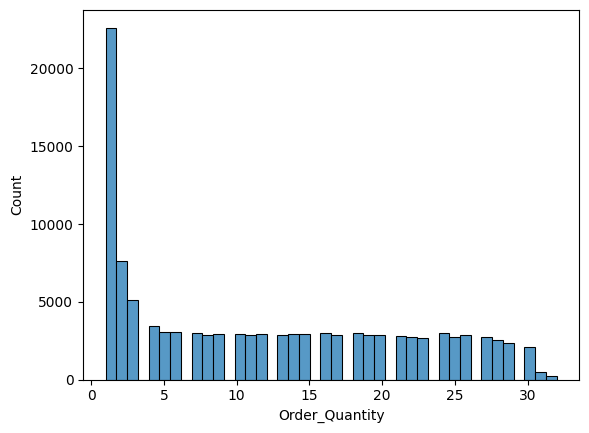

In [21]:
sns.histplot(data=bike_data,x='Order_Quantity')


<Axes: xlabel='Customer_Gender', ylabel='count'>

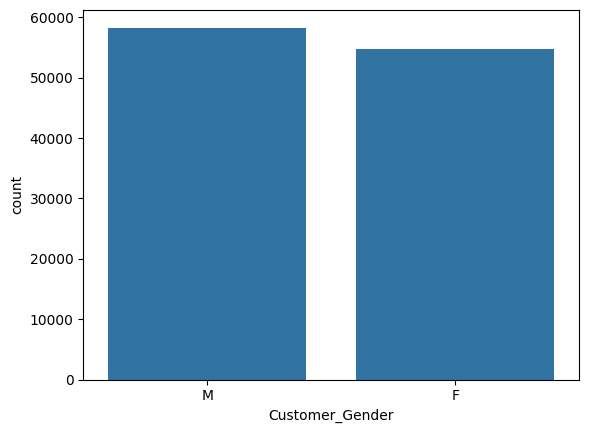

In [22]:
sns.countplot(data=bike_data, x='Customer_Gender')